# **Dataset Preparation**
### Sub section of the entire NYC Taxi and Limousine Commission trip record dataset during social/political events that impacted transportation patterns, particularly increased demand for taxis and rideshare services.

In [ ]:
#Read original dataset's paraquet files
import pandas as pd

file_path = '/content/yellow_tripdata_2024-10.parquet'

# Read the Parquet file into a pandas DataFrame
df = pd.read_parquet(file_path)

# Display the top 10 rows
print(df.head(10))


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-10-01 00:30:44   2024-10-01 00:48:26              1.0   
1         1  2024-10-01 00:12:20   2024-10-01 00:25:25              1.0   
2         1  2024-10-01 00:04:46   2024-10-01 00:13:52              1.0   
3         1  2024-10-01 00:12:10   2024-10-01 00:23:01              1.0   
4         1  2024-10-01 00:30:22   2024-10-01 00:30:39              1.0   
5         2  2024-10-01 00:31:20   2024-10-01 00:36:00              2.0   
6         1  2024-10-01 00:42:57   2024-10-01 00:49:01              1.0   
7         1  2024-10-01 00:59:55   2024-10-01 01:02:24              1.0   
8         1  2024-10-01 00:00:47   2024-10-01 00:04:22              0.0   
9         1  2024-10-01 00:17:36   2024-10-01 00:26:22              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.00         1.0                  N           162           246   
1           2.20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833771 entries, 0 to 3833770
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

Key Events considered with highest Trip counts:


1. New York City Comic Con: Oct-17 (Location# 161)
3. U.S. Presidential Election Rally – Donald Trump: Oct-27 (Location# 186)
3. Governor's Ball Music Fest: Jun-9 (Location# 93)



In [ ]:
# List to hold the filtered dataframes
filtered_dfs = []

Data subset based on events.

In [ ]:
# Define list of dates of the events-
date_list = ['2024-10-17']

# Define list of desired DOLocationIDs
location_id_list = [186]
#186 - Trump election Rally
#161 - Comic Con
#93 - Music Fest

# Convert the list of date strings to a list of datetime objects
from datetime import datetime
datetime_list = [datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in date_list]

# Filter by both date and PULocationID
filtered_df_list = df[
    (df['tpep_pickup_datetime'].dt.date.isin(datetime_list)) &
    (df['PULocationID'].isin(location_id_list))
]
print(f"Number of records filtered by both - Data and PULocationID: {len(filtered_df_list)}")

filtered_dfs.append(filtered_df_list)

Number of records filtered by both - Data and PULocationID: 4296


In [ ]:
# Combine records
filtered_df_list = pd.concat(filtered_dfs, ignore_index=True)

In [ ]:
# Get the count of records
record_count = len(filtered_df_list)

print(f"Number of records in filtered_df_list: {record_count}")

Number of records in filtered_df_list: 4296


#Statistical Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
import statsmodels.api as sm

Performing Statistical Tests while considering Target Variable as: ```fare_amount```

Running Shapiro-Wilk Test and Kolmogorov-Smirnov Test to check if the datatset is normally distributed.

In [ ]:
# Statistical Tests to check if data is normally distributed
print("\nStatistical Tests:")

column_to_check = filtered_df_list['fare_amount']

# Check if the selected column is numeric
if not pd.api.types.is_numeric_dtype(column_to_check):
    print(f"Error: Column '{column_to_check.name}' is not numeric. Please select a numeric column for statistical tests.")
else:
    # Shapiro-Wilk Test
    # Import shapiro function explicitly from scipy.stats
    from scipy.stats import shapiro

    shapiro_test_stat, shapiro_p_value = shapiro(column_to_check)
    print(f"Shapiro-Wilk Test:")
    print(f"  Test Statistic: {shapiro_test_stat:.4f}")
    print(f"  P-value: {shapiro_p_value:.4f}")

    if shapiro_p_value < 0.05:
        print("  Result: Data is likely not normally distributed (p < 0.05)")
    else:
        print("  Result: Data may be normally distributed (p >= 0.05)")

    # Kolmogorov-Smirnov Test (using the Lilliefors test for normality)
    try:
        import statsmodels.api as sm
        # sm.stats.lilliefors requires the data as an array or Series
        ks_test_stat, ks_p_value = sm.stats.lilliefors(column_to_check)
        print(f"\nKolmogorov-Smirnov (Lilliefors) Test:")
        print(f"  Test Statistic: {ks_test_stat:.4f}")
        print(f"  P-value: {ks_p_value:.4f}")

        if ks_p_value < 0.05:
            print("  Result: Data is likely not normally distributed (p < 0.05)")
        else:
            print("  Result: Data may be normally distributed (p >= 0.05)")
    except ImportError:
        print("\nStatsmodels not installed. Cannot perform Lilliefors test.")
        print("Install with: !pip install statsmodels")


Statistical Tests:
Shapiro-Wilk Test:
  Test Statistic: 0.8343
  P-value: 0.0000
  Result: Data is likely not normally distributed (p < 0.05)

Kolmogorov-Smirnov (Lilliefors) Test:
  Test Statistic: 0.1337
  P-value: 0.0010
  Result: Data is likely not normally distributed (p < 0.05)


Since data is non-linear, we use Spearman's correlation matrix to check correlation amongst columns in our dataset.


Spearman Correlation Coefficients with 'fare_amount':
fare_amount              1.000000
total_amount             0.972703
trip_distance            0.714481
tip_amount               0.492388
tolls_amount             0.282323
improvement_surcharge    0.211602
RatecodeID               0.176079
congestion_surcharge     0.117236
mta_tax                  0.095551
passenger_count          0.070922
VendorID                 0.027938
extra                    0.025100
DOLocationID            -0.031032
payment_type            -0.102660
Name: fare_amount, dtype: float64


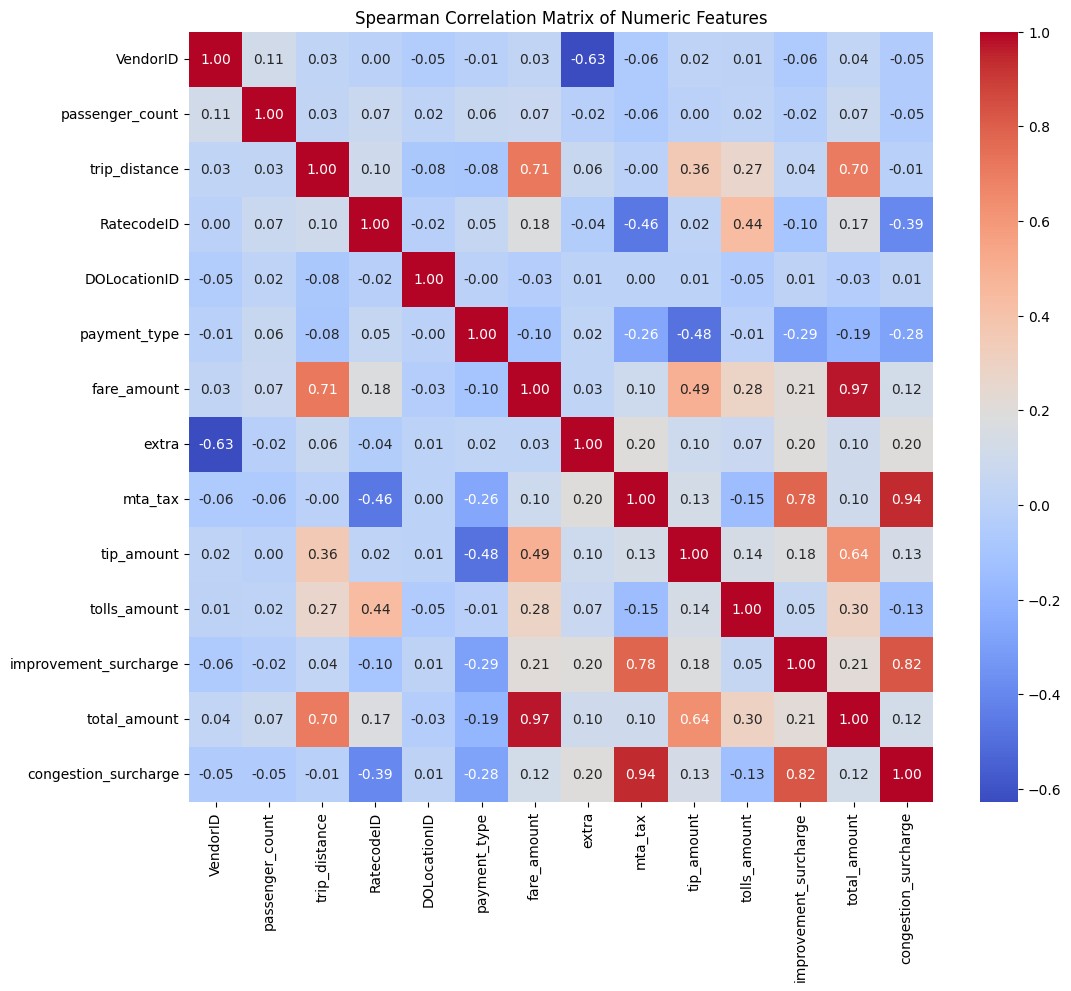

In [ ]:
#Spearman's Correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Select only numeric columns
numeric_cols = filtered_df_list.select_dtypes(include=['number'])

# Exclude columns with a single unique value for correlation calculation
cols_to_exclude_corr = ['PULocationID', 'Airport_fee']
numeric_cols_for_corr = numeric_cols.drop(columns=cols_to_exclude_corr, errors='ignore')


# Calculate the Spearman correlation matrix
spearman_corr_matrix = numeric_cols_for_corr.corr(method='spearman')

print("\nSpearman Correlation Coefficients with 'fare_amount':")
# Check if 'fare_amount' is in the correlation matrix before printing
if 'fare_amount' in spearman_corr_matrix.columns:
    print(spearman_corr_matrix['fare_amount'].sort_values(ascending=False))
else:
    print("'fare_amount' not found in the correlation matrix.")

# Visualize the Spearman correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Numeric Features')
plt.show()

Performing feature selection based on the correlation matrix. Hence, selected features with high correlation to `fare_amount`.

Dropping least correlated Columns:

```
['VendorID', 'mta_tax', 'extra', 'tip_amount', 'improvement_surcharge', 'tolls_amount', 'Airport_fee', 'congestion_surcharge', 'RatecodeID', 'payment_type', 'store_and_fwd_flag']
```



In [ ]:
# List of columns to drop
columns_to_drop = ['VendorID', 'mta_tax', 'extra', 'tip_amount', 'improvement_surcharge', 'tolls_amount', 'Airport_fee', 'congestion_surcharge', 'RatecodeID', 'payment_type', 'store_and_fwd_flag']

# Drop the specified columns from the DataFrame
filtered_df_list.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display the first few rows and the info to verify the columns are dropped
print(filtered_df_list.head())
print(filtered_df_list.info())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-10-17 19:11:20   2024-10-17 19:23:57              1.0           2.19   
1  2024-10-17 00:06:40   2024-10-17 00:20:35              2.0           2.74   
2  2024-10-17 00:07:11   2024-10-17 00:25:00              1.0           3.55   
3  2024-10-17 00:17:00   2024-10-17 00:20:35              1.0           0.63   
4  2024-10-17 00:39:25   2024-10-17 00:55:08              1.0           4.20   

   PULocationID  DOLocationID  fare_amount  total_amount  
0           186           211         13.5         24.00  
1           186           144         14.9         23.88  
2           186           263         20.5         33.15  
3           186            90          5.8         12.96  
4           186            24         20.5         25.50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         


Not dropping `PULocationID`, `DOLocationID` since it is required for our use case.

Checking VIF amongst columns to avoid features that are redundant with each other (to reduce multicollinearity).

In [ ]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd # Ensure pandas is imported if not already

# Select only numeric columns
numeric_cols = filtered_df_list.select_dtypes(include=['number'])

# Drop rows with NaN or inf values in the numeric columns
numeric_cols_cleaned = numeric_cols.replace([float('inf'), float('-inf')], pd.NA).dropna()

# Check if there are any rows left after dropping
if numeric_cols_cleaned.empty:
    print("No complete numeric data rows left after dropping missing values.")
else:
    # Add a constant term to the DataFrame
    numeric_cols_with_constant = numeric_cols_cleaned.copy()
    numeric_cols_with_constant['constant'] = 1

    # Calculate VIF for each numeric column
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_cols_with_constant.columns
    # Use the cleaned data for VIF calculation
    vif_data["VIF"] = [variance_inflation_factor(numeric_cols_with_constant.values, i)
                       for i in range(numeric_cols_with_constant.shape[1])]

    # Display the VIF data, excluding the constant
    print(vif_data[vif_data['feature'] != 'constant'])

           feature        VIF
0  passenger_count   1.002643
1    trip_distance   2.137604
2     PULocationID   0.000000
3     DOLocationID   1.020779
4      fare_amount  24.628791
5     total_amount  24.726609


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Since `fare_amount` and `total_amount` have high VIF(highly correlated), we keep only one column and drop the other column.

In [ ]:
# Drop the 'total_amount' column from the DataFrame
filtered_df_list.drop(columns=['total_amount'], axis=1, inplace=True)

# Display the first few rows and the info to verify the column is dropped
print(filtered_df_list.head())
print(filtered_df_list.info())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-10-17 19:11:20   2024-10-17 19:23:57              1.0           2.19   
1  2024-10-17 00:06:40   2024-10-17 00:20:35              2.0           2.74   
2  2024-10-17 00:07:11   2024-10-17 00:25:00              1.0           3.55   
3  2024-10-17 00:17:00   2024-10-17 00:20:35              1.0           0.63   
4  2024-10-17 00:39:25   2024-10-17 00:55:08              1.0           4.20   

   PULocationID  DOLocationID  fare_amount  
0           186           211         13.5  
1           186           144         14.9  
2           186           263         20.5  
3           186            90          5.8  
4           186            24         20.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime

# Data Preprocessing

In [ ]:
# Check for null values
filtered_df_list.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,133
trip_distance,0
PULocationID,0
DOLocationID,0
fare_amount,0


Impute the null values in the ```passenger_count``` column using the median, which is often a robust choice for numerical data.

In [ ]:
import pandas as pd

# Calculate the median of the 'passenger_count' column, ignoring nulls
median_passenger_count = filtered_df_list['passenger_count'].median()

# Fill the null values in 'passenger_count' with the calculated median
filtered_df_list['passenger_count'].fillna(median_passenger_count, inplace=True)

# Calculate the median of the 'congestion_surcharge' column, ignoring nulls
median_congestion_surcharge = filtered_df_list['congestion_surcharge'].median()

# Fill the null values in 'congestion_surcharge' with the calculated median
filtered_df_list['congestion_surcharge'].fillna(median_congestion_surcharge, inplace=True)

# Verify that there are no more nulls in 'passenger_count'
print("Null values in 'passenger_count' after imputation:")
filtered_df_list.isnull().sum()

Null values in 'passenger_count' after imputation:


/tmp/ipython-input-127-1929711848.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df_list['passenger_count'].fillna(median_passenger_count, inplace=True)
/tmp/ipython-input-127-1929711848.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
PULocationID,0
DOLocationID,0
fare_amount,0
extra,0
mta_tax,0
improvement_surcharge,0


Creating a ```trip_duration``` column that is the difference in time between ```tpep_dropoff_datetime``` and ```tpep_pickup_datetime``` for evaluation later on.

In [ ]:
# Convert datetime columns to datetime objects
filtered_df_list['tpep_pickup_datetime'] = pd.to_datetime(filtered_df_list['tpep_pickup_datetime'])
filtered_df_list['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df_list['tpep_dropoff_datetime'])

# Calculate trip duration in seconds
filtered_df_list['trip_duration'] = (filtered_df_list['tpep_dropoff_datetime'] - filtered_df_list['tpep_pickup_datetime']).dt.total_seconds()

# Display the first few rows with the new column
print(filtered_df_list.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-10-17 19:11:20   2024-10-17 19:23:57              1.0           2.19   
1  2024-10-17 00:06:40   2024-10-17 00:20:35              2.0           2.74   
2  2024-10-17 00:07:11   2024-10-17 00:25:00              1.0           3.55   
3  2024-10-17 00:17:00   2024-10-17 00:20:35              1.0           0.63   
4  2024-10-17 00:39:25   2024-10-17 00:55:08              1.0           4.20   

   PULocationID  DOLocationID  fare_amount  trip_duration  
0           186           211         13.5          757.0  
1           186           144         14.9          835.0  
2           186           263         20.5         1069.0  
3           186            90          5.8          215.0  
4           186            24         20.5          943.0  


Obtaining the correct Latitude and Longitudes based on the Taxi Zone IDs.

In [ ]:
import geopandas as gpd

# Load the shapefile
zone_gdf = gpd.read_file("taxi_zones.shp")

# Reproject from EPSG:2263 to EPSG:4326
zone_gdf = zone_gdf.to_crs(epsg=4326)

# Now compute centroids in lat/lon
zone_gdf['centroid'] = zone_gdf.geometry.centroid
zone_gdf['longitude'] = zone_gdf.centroid.x
zone_gdf['latitude'] = zone_gdf.centroid.y

# Preview
zone_gdf[['LocationID', 'latitude', 'longitude']].head()


/tmp/ipython-input-20-2204631572.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_gdf['centroid'] = zone_gdf.geometry.centroid
/tmp/ipython-input-20-2204631572.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_gdf['longitude'] = zone_gdf.centroid.x
/tmp/ipython-input-20-2204631572.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_gdf['latitude'] = zone_gdf.centroid.y


,LocationID,latitude,longitude
0,1,40.691831,-74.174000
1,2,40.616745,-73.831299
2,3,40.864474,-73.847422
3,4,40.723752,-73.976968
4,5,40.552659,-74.188484


In [ ]:
# Now, Merge pickup and dropoff coordinates from zones into our dataframe
filtered_df_list = filtered_df_list.merge(zone_gdf[['LocationID', 'latitude', 'longitude']],
                        left_on='PULocationID', right_on='LocationID', how='left')
filtered_df_list = filtered_df_list.rename(columns={'latitude': 'pickup_latitude', 'longitude': 'pickup_longitude'})
filtered_df_list = filtered_df_list.drop('LocationID', axis=1)

filtered_df_list = filtered_df_list.merge(zone_gdf[['LocationID', 'latitude', 'longitude']],
                        left_on='DOLocationID', right_on='LocationID', how='left')
filtered_df_list = filtered_df_list.rename(columns={'latitude': 'dropoff_latitude', 'longitude': 'dropoff_longitude'})
filtered_df_list = filtered_df_list.drop('LocationID', axis=1)

# Final preview
filtered_df_list[['PULocationID', 'pickup_latitude', 'pickup_longitude',
         'DOLocationID', 'dropoff_latitude', 'dropoff_longitude']].head()



,PULocationID,pickup_latitude,pickup_longitude,DOLocationID,dropoff_latitude,dropoff_longitude
0,186,40.748497,-73.992438,211,40.723888,-74.001538
1,186,40.748497,-73.992438,144,40.720889,-73.996919
2,186,40.748497,-73.992438,263,40.778766,-73.951010
3,186,40.748497,-73.992438,90,40.742279,-73.996971
4,186,40.748497,-73.992438,24,40.801970,-73.965480


Sorting data in ascending order based on ```tpep_pickup_datetime``` to get the trips in order.

In [ ]:
# Sort the DataFrame by 'tpep_pickup_datetime' in ascending order
filtered_df_list.sort_values(by='tpep_pickup_datetime', inplace=True)

# Display the first few rows to verify the sorting
print(filtered_df_list.head())

     tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
114   2024-10-17 00:00:01   2024-10-17 00:01:44              1.0   
97    2024-10-17 00:00:05   2024-10-17 00:11:39              1.0   
81    2024-10-17 00:00:40   2024-10-17 00:06:11              1.0   
4172  2024-10-17 00:01:09   2024-10-17 00:07:15              NaN   
4171  2024-10-17 00:01:09   2024-10-17 00:07:15              NaN   

      trip_distance  PULocationID  DOLocationID  fare_amount  trip_duration  \
114            0.02           186            68         3.70          103.0   
97             1.76           186           229        12.10          694.0   
81             0.59           186           164         7.20          331.0   
4172           0.82           186           137         8.04          366.0   
4171           0.82           186           137        -3.00          366.0   

      pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  
114         40.748497        -73.9924

In [ ]:
# Drop rows where either 'dropoff_latitude' or 'dropoff_longitude' is null
filtered_df_list.dropna(subset=['dropoff_latitude', 'dropoff_longitude'], inplace=True)


print("\nDataFrame after dropping rows with missing dropoff location:")
print(filtered_df_list.head())


DataFrame after dropping rows with missing dropoff location:
     tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
114   2024-10-17 00:00:01   2024-10-17 00:01:44              1.0   
97    2024-10-17 00:00:05   2024-10-17 00:11:39              1.0   
81    2024-10-17 00:00:40   2024-10-17 00:06:11              1.0   
4172  2024-10-17 00:01:09   2024-10-17 00:07:15              NaN   
4171  2024-10-17 00:01:09   2024-10-17 00:07:15              NaN   

      trip_distance  PULocationID  DOLocationID  fare_amount  trip_duration  \
114            0.02           186            68         3.70          103.0   
97             1.76           186           229        12.10          694.0   
81             0.59           186           164         7.20          331.0   
4172           0.82           186           137         8.04          366.0   
4171           0.82           186           137        -3.00          366.0   

      pickup_latitude  pickup_longitude  dropoff_latit

In [ ]:
# Rechecking if there are no null values for latitude and longitude columns.
print(filtered_df_list[['dropoff_latitude', 'dropoff_longitude']].isnull().sum())

dropoff_latitude     0
dropoff_longitude    0
dtype: int64


In [ ]:
# View of our preprocessed data.
filtered_df_list.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,trip_duration,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,4265,4265,4132.000000,4265.000000,4265.0,4265.000000,4265.000000,4265.000000,4.265000e+03,4.265000e+03,4265.000000,4265.000000
mean,2024-10-17 14:27:21.627901,2024-10-17 14:48:15.607503,1.253146,2.149447,186.0,161.991559,17.907456,1253.979601,4.074850e+01,-7.399244e+01,40.748175,-73.982452
min,2024-10-17 00:00:01,2024-10-17 00:01:44,0.000000,0.000000,186.0,1.000000,-102.800000,3.000000,4.074850e+01,-7.399244e+01,40.600324,-74.174000
25%,2024-10-17 09:53:30,2024-10-17 10:11:35,1.000000,0.960000,186.0,113.000000,10.700000,603.000000,4.074850e+01,-7.399244e+01,40.735035,-73.995135
50%,2024-10-17 14:53:49,2024-10-17 15:20:35,1.000000,1.450000,186.0,162.000000,15.600000,1033.000000,4.074850e+01,-7.399244e+01,40.748575,-73.984196
75%,2024-10-17 19:14:13,2024-10-17 19:35:17,1.000000,2.550000,186.0,231.000000,23.000000,1565.000000,4.074850e+01,-7.399244e+01,40.759818,-73.976495
max,2024-10-17 23:59:53,2024-10-20 12:02:18,6.000000,21.100000,186.0,263.000000,115.400000,237840.000000,4.074850e+01,-7.399244e+01,40.899529,-73.739473
std,NaN,NaN,0.730961,2.285444,0.0,67.063864,12.675645,4109.997261,6.253509e-13,2.870929e-12,0.024838,0.026974


Writing to Output File (.csv file)

In [ ]:
# Define the path for the new CSV file
output_file_path_csv = '/content/filtered_tripdata.csv'

filtered_df_list.to_csv(output_file_path_csv, index=False)

print(f"Filtered data saved to '{output_file_path_csv}'")

Filtered data saved to '/content/filtered_tripdata.csv'
